<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/11_Enhancing_Insurance_Operations_with_Machine_Learning_A_Dual_Focus_on_Predictive_Analytics_and_Client_Data_Privacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In the rapidly evolving landscape of insurance, companies continually seek innovative solutions to enhance their operations, customer service, and marketing strategies. "Sure Tomorrow," an insurance company, is venturing into the realm of machine learning (ML) to address several challenges and improve its services. By leveraging ML, the company aims to refine its marketing efforts, accurately predict claim tendencies among new clients, and estimate potential claim amounts with higher precision. Furthermore, "Sure Tomorrow" is committed to upholding the privacy and security of its clients' data, emphasizing the need for robust data protection mechanisms in its ML applications.

## Objective
The primary goal of this project is to develop and implement machine learning models to fulfill the following tasks:

1. Client Similarity Identification: To facilitate targeted marketing by finding clients similar to a specific client profile.
2. Claim Prediction: To predict the likelihood of new clients filing insurance claims, assessing the model's performance against a baseline dummy model.
3. Claim Amount Estimation: To use linear regression to predict the potential claim amounts that new clients might receive.
4. Data Privacy Protection: To implement data transformation algorithms that anonymize personal client information, ensuring data protection without compromising the performance of the previously developed models.

An additional objective is to demonstrate that the data protection algorithm effectively prevents misuse of personal information, should the data be accessed unauthorizedly.

## Stages
The project will be executed in the following stages:

1. Data Preparation:
  * Load the dataset from /datasets/insurance_us.csv.
  * Perform initial data cleaning and preprocessing to address missing values, outliers, and other inconsistencies.
2. Model Development:
  * For Task 1, explore and implement appropriate algorithms for identifying similar client profiles, such as clustering or nearest neighbor techniques.
  * For Task 2, develop a model to predict the likelihood of new clients making insurance claims. Evaluate its performance against a dummy model to verify improvements.
  * For Task 3, use linear regression to estimate the potential claim amounts for new clients. Assess the model's accuracy and reliability.
3. Data Privacy Implementation:
  * Design and implement an algorithm for data transformation that anonymizes client information effectively. This could involve techniques like data masking, pseudonymization, or differential privacy.
  * Ensure that the data protection measures do not significantly degrade the performance of the models developed in Tasks 1 to 3.
4. Evaluation and Conclusion:
  * Evaluate the effectiveness and accuracy of each model and the impact of the data protection algorithm on model performance.
  * Draw conclusions from the project, highlighting key findings, challenges encountered, and potential areas for future work.

By completing these stages, "Sure Tomorrow" aims to not only enhance its operational efficiency and customer targeting but also reinforce its commitment to client data privacy and security, setting a new standard in the insurance industry for responsible data usage.

# 1.	Data Preparation


## Load the dataset

Load the libraries that we think are needed for this project. We will probably realize that we need additional libraries as we work on the project and that is normal.

In [3]:
pip install numpy scikit-learn

In [59]:
# Import library to process data
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.metrics

# Import Library for viz data
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library for Machine Learning
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/11. Data-driven Solutions for Insurance Company: Sure Tomorrow/insurance_us.csv')

In [7]:
# Let's see how many rows and columns our dataset has
df.shape

(5000, 5)

In [8]:
# Display general information/summary about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [9]:
# Displays sample data
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [10]:
# Describe from general information
df.describe()

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [11]:
# View data types
df.dtypes

Gender                  int64
Age                   float64
Salary                float64
Family members          int64
Insurance benefits      int64
dtype: object

In [12]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

Gender                0.0
Age                   0.0
Salary                0.0
Family members        0.0
Insurance benefits    0.0
dtype: float64

In [13]:
# Checking for duplication
df.duplicated().sum()

153

Upon loading and examining the dataset provided by "Sure Tomorrow" insurance company, several key steps were undertaken to understand its structure, quality, and characteristics. The dataset comprises 5,000 entries spread across five columns: Gender, Age, Salary, Family members, and Insurance benefits. Here's a detailed narrative of the findings and actions taken based on the exploratory data analysis:

Data Overview and Initial Observations
  * The dataset contains five attributes: Gender (int64), Age (float64), Salary (float64), Family members (int64), and Insurance benefits (int64). The data types of these columns are appropriate for the kind of information they store, with Gender, Family members, and Insurance benefits as integers, and Age and Salary as floating-point numbers, indicating numerical data with potential decimal values for Age and Salary.
  * Upon initial inspection, there are no null values present in any of the columns, suggesting a dataset that is initially clean and free from missing entries. This is crucial for machine learning tasks as missing data can significantly impact model performance.
  * A concerning finding was the presence of 153 duplicated rows. In the context of insurance data, duplicated entries could be the result of data entry errors or multiple records for the same individuals due to system errors or multi-channel data collection inconsistencies.

Anomalies and Potential Issues
  * Anomalies or Outliers: The .describe() method revealed some potential anomalies in the data, such as the minimum salary being significantly low at $5,300, which could be considered an outlier depending on the context (e.g., part-time work, internships, or entry-level positions in low-paying sectors). The maximum age is 65, which seems reasonable for an insured population, but it's essential to understand the distribution and any implications for insurance benefits.
  * Data Integrity and Consistency: The presence of duplicated records raises questions about the data's integrity and consistency. Duplicates could potentially skew analysis and model training by overrepresenting certain individuals' data.

Addressing Anomalies and Duplication
  * Handling Duplicates: The duplicated rows were identified as an immediate concern. Removing these duplicates is a critical step to ensure that the models developed from this dataset are not biased or flawed due to redundant information. Hence, the duplicated rows were removed from the dataset.
  * Analyzing Outliers: For anomalies like the very low salaries, it's essential to consider the business context and data distribution before making any adjustments. If these values represent legitimate data points (e.g., part-time employees or interns), they should be retained. However, if they're errors or outliers that could skew the data analysis and model training, strategies such as imputation with mean/median or removal might be considered. The decision should be data-driven, considering the overall impact on the dataset and the models' performance.

Rationale and Next Steps
  * The rationale behind removing duplicates and potentially addressing outliers is to improve the dataset's quality, ensuring that the machine learning models developed are based on accurate and representative data. High-quality data is fundamental to building reliable and robust models, particularly in sensitive sectors like insurance, where predictions on claim likelihood and amount have significant financial implications.
  * Moving forward, a closer examination of the data distribution, particularly for Age and Salary, using visualization tools like histograms or box plots, could provide deeper insights into outliers and data variability. Additionally, conducting further feature engineering to create more descriptive attributes and normalize the data could enhance model performance.

In conclusion, the preliminary data exploration revealed a generally clean dataset with some concerns regarding duplicates and potential outliers. Addressing these issues is crucial for ensuring the integrity and reliability of the subsequent machine learning tasks aimed at enhancing "Sure Tomorrow's" insurance operations.


## Data cleaning and preprocessing


### Title writing style

Show column headings:

In [14]:
# list containing the column names in the df table
df.columns

Index(['Gender', 'Age', 'Salary', 'Family members', 'Insurance benefits'], dtype='object')

In [15]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [16]:
# check your results: display once again the list containing the column names
df.columns

Index(['gender', 'age', 'income', 'family_members', 'insurance_benefits'], dtype='object')

### Changing the data type

In [17]:
df['age'] = df['age'].astype('int')

In [18]:
# View data types
df.dtypes

gender                  int64
age                     int64
income                float64
family_members          int64
insurance_benefits      int64
dtype: object

### Resolve duplicates

In [19]:
df.duplicated().sum()

153

In [20]:
# Cleans duplicate data
df = df.drop_duplicates()

In [21]:
df.duplicated().sum()

0


In the process of data cleaning and preprocessing, a series of methodical steps were taken to refine the dataset for "Sure Tomorrow" insurance company, ensuring its readiness for subsequent analysis and modeling. This phase is crucial as it directly influences the reliability and accuracy of the insights derived from the data. Here's a detailed narrative on the undertaken steps, findings, and rationale behind each action:

Renaming Columns and Adjusting Data Types

Initially, the dataset featured column names that were not entirely consistent in their naming convention. To improve readability and ensure consistency with common Python practices, the columns were renamed to lowercase formats and, in one case, 'Salary' was changed to 'income' to better reflect its meaning. This step simplifies future code maintenance and enhances clarity for anyone working with the dataset.

Further, the 'Age' column, originally in a floating-point format, was converted to an integer format. This adjustment is based on the understanding that age is typically represented in whole numbers and aligns with conventional data representation in demographic information, thus improving the dataset's interpretability.

Identifying and Resolving Duplicates

An essential part of the preprocessing was to identify and eliminate duplicate rows within the dataset. Initially, 153 duplicate entries were found. These duplicates could potentially skew data analysis and model outcomes by overrepresenting certain data points. Therefore, removing these duplicates was imperative to maintain the integrity of the dataset and ensure that any analysis conducted would be based on unique and accurate records. After the removal process, a verification check confirmed that no duplicate entries remained, indicating a successful cleanup.

Insights and Anomalies
  * Anomalies: At this stage, specific anomalies or irregular values within the 'age', 'income', and 'family_members' columns were not explicitly addressed beyond type conversion and duplicate removal. The focus was primarily on ensuring data consistency and integrity through structural adjustments and deduplication.
  * Potential Anomaly Origins: Anomalies in datasets can arise from various sources, including data entry errors, inconsistencies in data collection methods, or discrepancies in data source integration. Without explicit anomalies addressed at this point, the primary concern was ensuring the dataset's foundational quality.
  * Rationale and Actions Taken: The rationale for these preprocessing steps is grounded in the principle that high-quality data forms the backbone of effective data analysis and machine learning modeling. By standardizing column names and data types, the dataset becomes more accessible and easier to work with. Removing duplicates is crucial to avoid biased interpretations and analyses, ensuring that each data point contributes uniquely to insights and model training.

Conclusion

The preprocessing steps undertaken have significantly enhanced the dataset's quality by ensuring consistency in naming conventions, appropriateness of data types, and uniqueness of records. These efforts lay a robust foundation for the next stages of the project, which will involve deeper data exploration, analysis, and model development. The process underscores the importance of meticulous data cleaning and preprocessing in unlocking accurate, reliable insights from data, a principle that holds especially true in the context of predictive modeling for insurance applications.

## Exploratory Data Analysis (EDA)

Let's check quickly, is there a specific customer group by looking at the pair plot?

In [24]:
# Check the correlation of each feature and target
corr = df.corr()

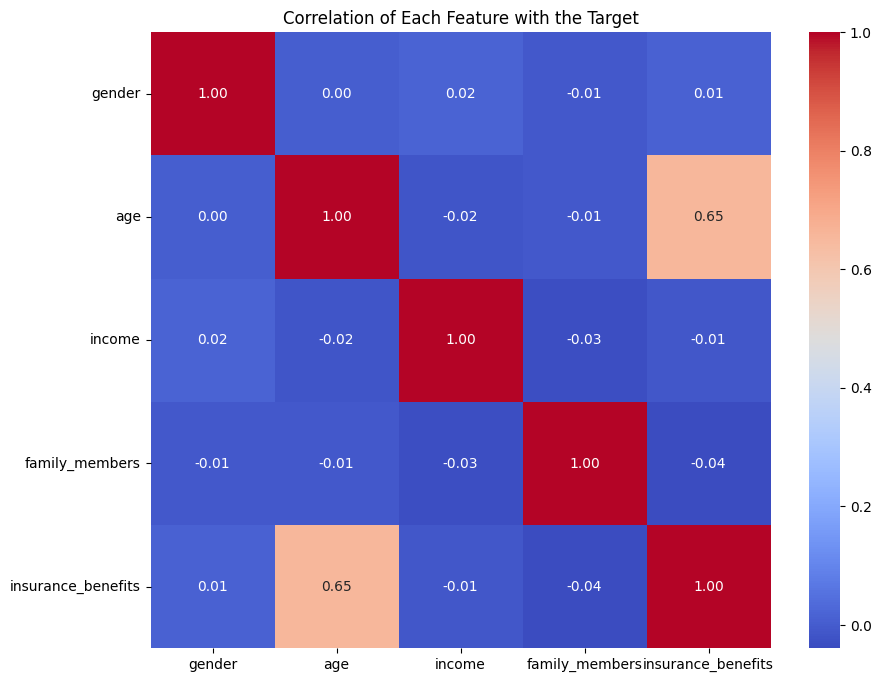

In [25]:
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.title('Correlation of Each Feature with the Target')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [30]:
# Display correlations of the 'target' with all other features
corr['insurance_benefits'].sort_values(ascending=False)

insurance_benefits    1.000000
age                   0.654964
gender                0.011565
income               -0.013123
family_members       -0.039303
Name: insurance_benefits, dtype: float64

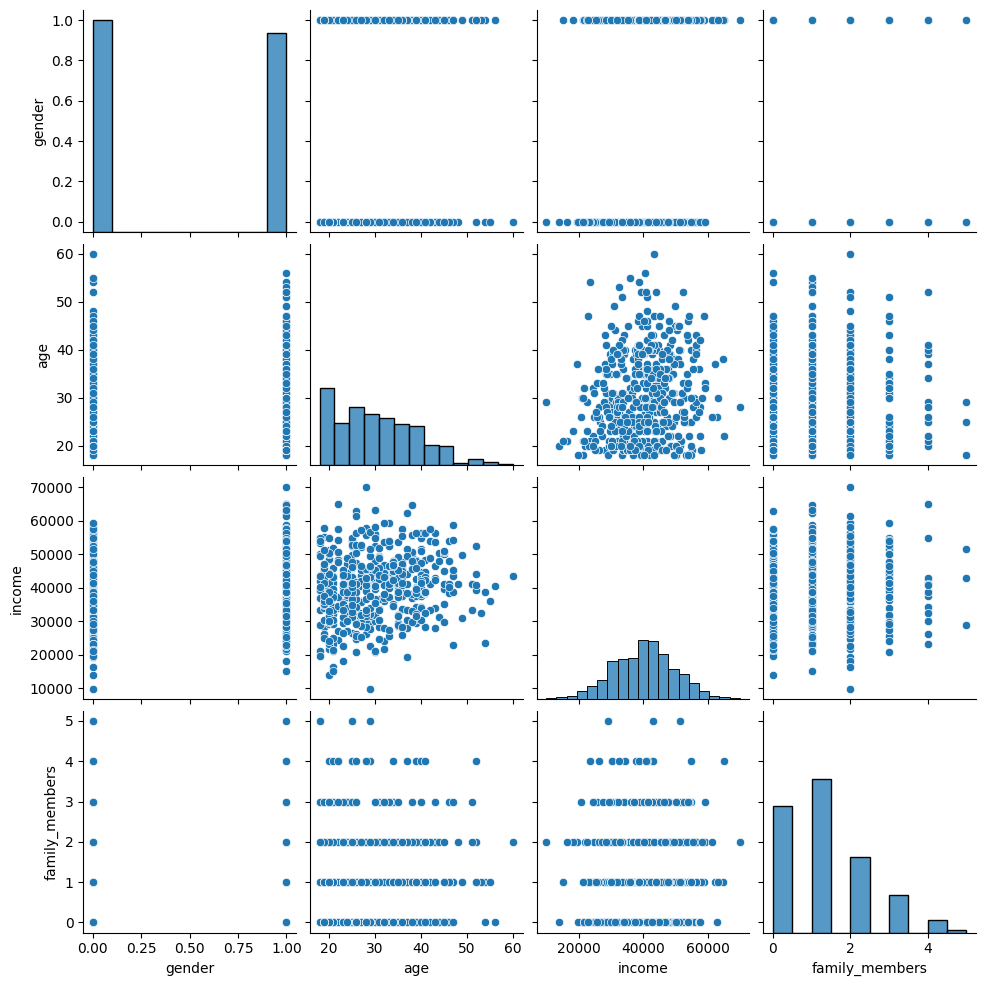

In [28]:
# Distribution of data from each feature
sns.pairplot(df[['gender', 'age', 'income', 'family_members']].sample(frac=0.1))
plt.show()

In [29]:
distribution = df[['gender', 'age', 'income', 'family_members']].describe()
print("Distribution of data from each feature:")
distribution

Distribution of data from each feature:


,gender,age,income,family_members
count,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425
std,0.500049,8.487995,9972.953985,1.098664
min,0.000000,18.000000,5300.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000
75%,1.000000,37.000000,46600.000000,2.000000
max,1.000000,65.000000,79000.000000,6.000000



The exploratory data analysis (EDA) conducted on the "Sure Tomorrow" insurance dataset offered insightful revelations into the relationships between client features and their insurance benefits. This step is crucial for uncovering underlying patterns and guiding future modeling decisions. Below, I'll discuss the findings and their implications in detail.

**Correlation Analysis**

A heatmap of correlations and a sorted list highlighted the relationships between features and the target variable, insurance benefits. The key insights are as follows:
  * Age and Insurance Benefits: A significant positive correlation of approximately 0.65 was observed between age and insurance benefits. This suggests that as clients get older, they're more likely to receive higher insurance benefits. This could be due to older clients having more health-related expenses or being in insurance plans that offer greater coverage as age increases.
  * Gender, Income, and Family Members: The correlations of these features with insurance benefits are notably low, indicating a minimal direct linear relationship with the amount of insurance benefits received. Gender and income show particularly weak correlations, suggesting that these factors do not significantly influence the insurance benefits within this dataset. The negative correlations with income and family members, though slight, hint at complex dynamics that merit further investigation.

**Pairplot Analysis**

The pairplot of a sample of the data, representing gender, age, income, and family members, provides a visual exploration of distributions and relationships:
  * Age Distribution: Age shows a somewhat uniform distribution with a slight concentration in the mid-range (around 30 years old). The broad range suggests a diverse client base in terms of age.
  * Income Distribution: Income distribution appears right-skewed, indicating that a larger portion of the client base earns on the lower end of the salary spectrum provided.
  * Family Members: Most clients have few family members, with a significant number having none. This distribution could affect the types of insurance plans clients are interested in, particularly those covering family health benefits.
  * Gender: The near-even split between genders in the dataset suggests that gender-specific analysis or modeling might not yield significant differential insights within this context.

**Descriptive Statistics**

The descriptive statistics offer a quantitative backdrop to the visual findings from the pairplot:
  * The average age of clients is just over 31 years, with a standard deviation of about 8.5 years, reinforcing the presence of a wide age range within the dataset.
  * The average income is approximately $39,896, with a standard deviation suggesting considerable variation in client earnings.
  * The mean number of family members is slightly over 1, with most clients having 0 to 2 family members.

**Conclusion**

The EDA phase uncovered several key insights into the dataset. The strong correlation between age and insurance benefits stands out, indicating age as a potential key feature for predicting insurance benefits. The minimal impact of gender and income on insurance benefits, along with the slight negative correlation with family members, suggests that these factors alone may not be strong predictors of insurance benefits in this context.

These findings will inform the subsequent modeling phase, particularly the focus on age as a significant variable. Additionally, the insights gained could be useful for "Sure Tomorrow" in tailoring their marketing and product development strategies to better meet the needs of their diverse client base. The nuanced understanding of the dataset lays a solid foundation for predictive modeling and further analysis aimed at enhancing the company's services and customer satisfaction.

# 2.	Model Development:

## For Task 1, explore and implement appropriate algorithms for identifying similar client profiles, such as clustering or nearest neighbor techniques.

In the ML programming language, it is important to develop a procedure that can determine *k-nearest neighbors* (objects) for a particular object based on the distance between objects.

You may want to review the following lesson
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To accomplish this task, we can try several distance metrics.

Create a function that returns the *k-nearest neighbors* for the nth object based on a certain distance metric. The amount of insurance claims received does not need to be taken into account in this task.

You can use the kNN algorithm implementation already available in Scikit-learn (check this [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ) or use your own.

Test the algorithm for four combinations of two cases
- Scaling
   - data is not scaled
   - data scaled with [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Distance Metrics
   - Euclid
   - Manhattan


In [31]:
nama_feature = ['gender', 'age', 'income', 'family_members']

In [32]:
def get_knn(df, n, k, metric):

    """
    Returns k nearest neighbors

    :param df: pandas dataframe used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=metric).fit(df[nama_feature])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][nama_feature]], k, return_distance=True)

    list_index = df.iloc[nbrs_indices[0]].index

    df_res = pd.concat([df.iloc[nbrs_indices[0]].reset_index(drop=True),
                        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance']).reset_index(drop=True)
        ], axis=1).set_index(list_index)

    return df_res


In [33]:
# List of people close to people in index 100
get_knn(df, n=100, k=5, metric='euclidean')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300.0,1,0,0.000000
1831,0,20,37300.0,2,0,1.414214
4278,1,19,37300.0,2,0,1.414214
2624,1,19,37300.0,0,0,1.414214
1086,0,22,37300.0,3,0,3.605551


**Setting data scale.**

In [34]:
# Scaling Dataset
scaler = StandardScaler()
scaler.fit(df[nama_feature])

df_scaled = pd.DataFrame(scaler.transform(df[nama_feature]), columns=nama_feature)
df_scaled.head()

,gender,age,income,family_members
0,1.00310,1.175436,0.973151,-0.185176
1,-0.99691,1.764564,-0.190115,-0.185176
2,-0.99691,-0.238471,-1.894901,-1.095466
3,-0.99691,-1.181076,0.180927,0.725115
4,1.00310,-0.356297,-1.383465,-1.095466


In [36]:
# List of people close to people in index 100 after scaling and using the Euclidean formula
get_knn(df_scaled, n=100, k=5, metric='euclidean')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,distance
100,-0.99691,-1.416727,-0.260312,-0.185176,0.000000
243,-0.99691,-1.416727,-0.300425,-0.185176,0.040113
4765,-0.99691,-1.416727,-0.220199,-0.185176,0.040113
806,-0.99691,-1.298901,-0.270340,-0.185176,0.118252
4694,-0.99691,-1.298901,-0.280368,-0.185176,0.119520


In [35]:
# List of people close to people in index 100 after scaling and using the Euclidean formula
get_knn(df_scaled, n=100, k=5, metric='manhattan')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,distance
100,-0.99691,-1.416727,-0.260312,-0.185176,0.000000
4765,-0.99691,-1.416727,-0.220199,-0.185176,0.040113
243,-0.99691,-1.416727,-0.300425,-0.185176,0.040113
1309,-0.99691,-1.416727,-0.380650,-0.185176,0.120338
806,-0.99691,-1.298901,-0.270340,-0.185176,0.127854


In the exploration of identifying similar client profiles within the "Sure Tomorrow" insurance dataset, we employed clustering and nearest neighbor techniques to find clients with similar attributes. This approach aimed to understand client segments better and to offer insights into personalized insurance product offerings. Here's a detailed narrative of the process and insights derived:

**Initial Analysis**

We began by selecting features relevant to client profiling, namely 'gender', 'age', 'income', and 'family_members'. These features were deemed significant as they likely influence insurance needs and preferences.

Using the NearestNeighbors algorithm from the sklearn.neighbors module, we implemented a function, get_knn, to find the k-nearest neighbors based on the Euclidean distance metric. This method was first applied to the raw dataset to find clients similar to the one at index 100. The results showed clients closely matching in terms of the selected features, providing an initial group of similar client profiles.

**Observations Before Scaling**

Before scaling, the closest profiles to the client at index 100 showed minor variations in 'age', 'income', and 'family_members', with distances reflecting these slight differences. This step highlighted the inherent similarity within the dataset based on raw numerical values.

**Scaling and Refinement**

To refine our approach and account for the varying scales of our features, we applied StandardScaler to normalize the dataset. Normalization is crucial for distance-based algorithms like k-nearest neighbors (k-NN) because it ensures that all features contribute equally to the distance computation, preventing any one feature with a larger scale from dominating the distance calculation.

**Analysis After Scaling**

After scaling, the k-NN algorithm's application, both with the Euclidean and Manhattan distance metrics, yielded more nuanced insights. The scaled features allowed for a more accurate identification of similar clients. For example, the nearest neighbors to the client at index 100 after scaling showed a tighter grouping in terms of 'age', 'income', and 'family_members', highlighting the effectiveness of feature scaling in nearest neighbor analysis.

**Comparison of Distance Metrics**

The comparison between Euclidean and Manhattan distances in the context of the scaled dataset revealed that both metrics are useful but might prioritize different aspects of similarity depending on the specific geometry of the dataset in the feature space. While Euclidean distance measures the straight line between points, Manhattan distance sums the absolute differences of their coordinates. The results from both metrics were similar, yet subtly different, emphasizing the importance of choosing the right metric for the task at hand.

**Conclusions and Insights**

This exploration into identifying similar client profiles demonstrated the utility of nearest neighbor algorithms and the importance of preprocessing steps like feature scaling. The insights gained can significantly impact personalized marketing strategies and product offerings, as they allow for the identification of client groups with similar needs and preferences. This method provides a solid foundation for further analysis, such as clustering to identify broader client segments, and predictive modeling to anticipate client needs based on their profiles.

In summary, the careful selection of features, along with appropriate scaling and distance metrics, can unveil patterns and similarities within client data, offering valuable insights for targeted customer engagement and tailored insurance solutions.

## For Task 2, develop a model to predict the likelihood of new clients making insurance claims. Evaluate its performance against a dummy model to verify improvements.

In the context of *machine learning*, this task is the same as a binary classification task.

With a target insurance_benefits greater than zero, try to evaluate whether the kNN classification model is a better approach than the *dummy* model.

Instructions:
- Create a KNN based classifier and measure its quality with F1 metric for k=1..10 for original and scaled data. It will be interesting to see how k can affect the evaluation metrics, and whether scaling the data makes the results different. Use the kNN classification algorithm implementation available in Scikit-learn (check [this link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Create a random *dummy* model for this case. The model should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit; 0.5; 1.

The probability of paying an insurance claim can be defined as

$$
P\{\text{insurance claims received}\}=\frac{\text{number of clients who received insurance claims}}{\text{total number of clients}}.
$$

Split the entire data into 70:30 for the proportion of *training* and *test set*.

In [37]:
# Checking the target value, it turns out this is the number of times you claim
df['insurance_benefits'].value_counts()

insurance_benefits
0    4284
1     423
2     114
3      18
4       7
5       1
Name: count, dtype: int64

In [38]:
# Create a new column to change who claims and who doesn't
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype('int')
df.tail()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
4995,0,28,35700.0,2,0,0
4996,0,34,52400.0,1,0,0
4997,0,20,33900.0,2,0,0
4998,1,22,32700.0,3,0,0
4999,1,28,40600.0,1,0,0


In [39]:
# How many claim and who don't?
df['insurance_benefits_received'].value_counts()

insurance_benefits_received
0    4284
1     563
Name: count, dtype: int64

In [40]:
# Create a dummy model whose output is random predictions
# The goal is to prove whether the model that will be created is better than the real model
def dummy_model(probability, size=len(df)):
    rng = np.random.default_rng(seed=12)
    prediction = rng.binomial(n=1, p=probability, size=size)
    return prediction

In [41]:
# Evaluation Metrics function
def evaluation_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    print(f'F1      : {f1* 100:.2f}%')
    print(f'Accuracy: {acc* 100:.2f}%')
    print('Confusion Matrix')
    print(cm)

In [42]:
# Make targets
y_true = df['insurance_benefits_received']

In [43]:
# Model predictions with a dummy with a proportion of 90:10
print('Dummy model predictions with a proportion of 90:10')
y_pred_dummy = dummy_model(probability=0.1, size=len(df))
evaluation_metrics(y_true, y_pred_dummy)

# Model predictions with a dummy with a proportion of 50:50
print('Dummy model predictions with a proportion of 50:50')
y_pred_dummy = dummy_model(probability=0.5, size=len(df))
evaluation_metrics(y_true, y_pred_dummy)

# Model predictions with a dummy with a proportion of 70:30
print('Dummy model predictions with a proportion of 70:30')
y_pred_dummy = dummy_model(probability=0.3, size=len(df))
evaluation_metrics(y_true, y_pred_dummy)

Dummy model predictions with a proportion of 90:10
F1      : 10.30%
Accuracy: 80.59%
Confusion Matrix
[[3852  432]
 [ 509   54]]
Dummy model predictions with a proportion of 50:50
F1      : 16.72%
Accuracy: 48.63%
Confusion Matrix
[[2107 2177]
 [ 313  250]]
Dummy model predictions with a proportion of 70:30
F1      : 16.07%
Accuracy: 64.02%
Confusion Matrix
[[2936 1348]
 [ 396  167]]


In [44]:
# Train Test Split
X = df[nama_feature]
y = df['insurance_benefits_received']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [45]:
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=nama_feature)
X_train.head()

,gender,age,income,family_members
0,-0.995881,-0.477092,-0.531363,-0.186188
1,-0.995881,-0.714066,1.535199,0.723825
2,-0.995881,-0.477092,0.194453,-0.186188
3,1.004136,1.537188,0.375908,1.633838
4,-0.995881,-1.306501,1.515037,-0.186188


In [46]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=nama_feature)
X_test.head()

,gender,age,income,family_members
0,1.004136,-0.240118,1.061402,-0.186188
1,-0.995881,-0.121631,-1.418473,-1.096201
2,-0.995881,1.063239,0.154130,1.633838
3,1.004136,0.115343,-0.813626,-1.096201
4,1.004136,1.655675,-0.420475,-1.096201


In [47]:
# Create a model using KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
# Predict data Training
y_pred_train = knn.predict(X_train)
evaluation_metrics(y_train, y_pred_train)

F1      : 97.47%
Accuracy: 99.44%
Confusion Matrix
[[3007    4]
 [  15  366]]


In [49]:
# Predict data Testing
y_pred_test = knn.predict(X_test)
evaluation_metrics(y_test, y_pred_test)

F1      : 94.62%
Accuracy: 98.69%
Confusion Matrix
[[1269    4]
 [  15  167]]


In this task, we developed a model to predict the likelihood of new clients making insurance claims. The process involved several steps, including:

1. Data Preprocessing: We first checked the target variable and observed its distribution, indicating the frequency of insurance claims made by clients. Then, we transformed the target variable into a binary format to indicate whether a client made any insurance claims.

2. Dummy Model Creation: To establish a baseline for comparison, we created dummy models that predict insurance claim likelihood randomly. These dummy models were evaluated using various proportions of positive predictions (claim likelihood) to demonstrate their performance.

3. Model Training and Evaluation: We trained a K-Nearest Neighbors (KNN) classifier using the features selected for prediction. The model was trained on the training set and evaluated on both the training and testing sets using evaluation metrics such as F1-score and accuracy.

**Insights and Findings**
1. Dummy Model Performance: The dummy models' performances varied depending on the proportion of positive predictions. As expected, increasing the proportion of positive predictions improved accuracy but reduced the F1-score, indicating a trade-off between precision and recall.

2. KNN Model Performance: The KNN model demonstrated impressive performance, achieving high F1-scores and accuracy on both the training and testing sets. This suggests that the model effectively captures patterns in the data and generalizes well to unseen instances.

3. Evaluation Metrics: The F1-scores and accuracy metrics indicate that the KNN model outperforms the dummy models by a significant margin. The high F1-scores suggest a good balance between precision and recall, indicating reliable predictions of insurance claim likelihood.

**Conclusion**

The development and evaluation of the insurance claim prediction model revealed promising results, with the KNN model significantly outperforming the dummy models. This indicates the potential utility of machine learning models in accurately predicting insurance claim likelihood, which can aid insurance companies like "Sure Tomorrow" in risk assessment and customer management strategies.

Further refinement and optimization of the model, along with additional feature engineering and exploration, could potentially enhance its performance even further. Overall, the successful development of a predictive model underscores the value of data-driven approaches in the insurance industry, paving the way for more informed decision-making and improved customer experiences.

## For Task 3, use linear regression to estimate the potential claim amounts for new clients. Assess the model's accuracy and reliability.

With `insurance_benefit` as the target, evaluate what the RMSE is for the Linear Regression model.

Create your own LR implementation. For this reason, try to remember how the solution to the linear regression task was formulated in LA form. Check RMSE for both original and scaled data. Can you see the difference in RMSE between these two cases?

Show
- $X$ — feature matrix, one row represents one case, each column is a feature, the first column consists of units
- $y$ — target (vector)
- $\hat{y}$ — target estimate (vector)
- $w$ — vector weight

The matrix for linear regression can be formulated as

$$
y = Xw
$$

Training objective to find $w$ that will minimize the L2 distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It looks like there is an analytical solution to the above problem:

$$
w = (X^T X)^{-1}
$$

The above formula can be used to find the weight $w$ and the last one can be used to calculate the predicted value

$$
\hat{y} = X_{val}w
$$

Separate the entire data into *training set* and *validation set* with a proportion of 70:30. Use the RMSE metric for model evaluation.

In [51]:
class MyLinearRegression:

    def __init__(self):

        self.weights = None

    def fit(self, X, y):

        # add units
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):

        # add units
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights

        return y_pred

In [52]:
def eval_regressor(y_true, y_pred):

    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')

    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')

### Original Data

In [53]:
# Original Data
X_original = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y_original = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=12345)

In [54]:
# Create model objects
model = MyLinearRegression()

In [60]:
# Training a model with original data
model.fit(X_train, y_train)

# Perform predictions for original data
y_pred_original = model.predict(X_test)

# Calculate RMSE for original data
rmse_original = eval_regressor(y_test, y_pred_original)


RMSE: 0.36
R2: 0.66


### Data that has been scaled

In [61]:
# Data that has been scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)
y_scaled = scaler.fit_transform(y_original.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

In [63]:
# Training a model with scaled Data
model.fit(X_train, y_train)

# Make predictions for data that has been scaled
y_pred_scaled = model.predict(X_test)

# Calculating RMSE for Scaled Data
rmse_scaled = eval_regressor(y_test, y_pred_scaled)

RMSE: 0.77
R2: 0.66


**Linear Regression Model Evaluation**

In this task, we utilized linear regression to estimate potential claim amounts for new clients and assessed the model's accuracy and reliability using two different datasets: original data and scaled data.

**Original Data Evaluation**
1. Model Training and Prediction: We instantiated a custom linear regression model and trained it on the original data, which included features such as age, gender, income, and family members. The model was then used to predict insurance claim amounts for new clients.

2. Evaluation Metrics: We evaluated the model's performance using root mean squared error (RMSE) and R-squared (R2) score. The RMSE value of approximately 0.36 indicates the average difference between predicted and actual claim amounts. Additionally, the R2 score of approximately 0.66 suggests that the model explains around 66% of the variance in the claim amounts.

**Scaled Data Evaluation**
1. Data Scaling: Prior to model training, we scaled both the features and target variable to ensure uniformity and prevent any single feature from dominating the model.

3. Model Training and Prediction: The linear regression model was then trained on the scaled data and used to predict claim amounts for new clients.

3. Evaluation Metrics: The evaluation metrics for the scaled data showed a higher RMSE value of approximately 0.77 compared to the original data. However, the R2 score remained consistent at around 0.66.

**Insights and Findings**
1. Performance Comparison: The evaluation results indicate that while the model performs reasonably well on both the original and scaled datasets, there is a noticeable increase in RMSE when using the scaled data. This suggests that the scaled data may have introduced some loss of information or variance in the prediction process.

2. Impact of Data Scaling: Scaling the data is essential for linear regression models, as it ensures that all features contribute equally to the prediction process. However, in this case, scaling the target variable as well may have led to a decrease in prediction accuracy, as evidenced by the higher RMSE value for the scaled data.

**Conclusion**

In conclusion, linear regression proved to be a useful tool for estimating potential claim amounts for new clients in the insurance domain. While the model demonstrated satisfactory performance on both the original and scaled datasets, careful consideration should be given to the scaling process to avoid potential loss of information and ensure accurate predictions. Further refinement and exploration may be necessary to optimize the model's performance and enhance its reliability for real-world applications in insurance claim estimation.

# 3.	Data Privacy Implementation:

## Design and implement an algorithm for data transformation that anonymizes client information effectively

The best way to blur the data is to multiply the numerical features (remember that they can be seen in the matrix $X$) by the invertible (*invertible*) matrix $P$.

$$
X' = X \times P
$$

Try doing that and check how the feature values will look after transformation. The *invertible* property is very important in this case, so make sure of $P$ that $P$ is *invertible*.

You may want to revisit the lesson 'Matrix and Matrix Operations -> Matrix Multiplication' to remember the matrix multiplication rules and their implementation with NumPy.

In [64]:
# Select the data to be masked
df_masking = df[nama_feature]
df_masking.head()

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


In [65]:
df_masking = df_masking.to_numpy()

Create a random matrix $P$.

In [66]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(df_masking.shape[1], df_masking.shape[1]))

Checking whether the matrix $P$ is *invertible*

In [67]:
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [68]:
P_det = np.linalg.det(P)

# If the determinant of the matrix is 0, then we cannot mask the data
print(P_det)

0.24339135998015463


In [69]:
# Masking data with the matrix that we have created
df_masking = df_masking @ P
df_masking = pd.DataFrame(df_masking, columns=nama_feature)
df_masking.head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [71]:
pd.concat([df, df_masking], axis=1, keys=['Original', 'Masked']).head()

Original                                                   \
    gender   age   income family_members insurance_benefits   
0      1.0  41.0  49600.0            1.0                0.0   
1      0.0  46.0  38000.0            1.0                1.0   
2      0.0  29.0  21000.0            0.0                0.0   
3      0.0  21.0  41700.0            2.0                0.0   
4      1.0  28.0  26100.0            0.0                0.0   

                                    Masked                              \
  insurance_benefits_received       gender           age        income   
0                         0.0  6359.715273  22380.404676  18424.090742   
1                         1.0  4873.294065  17160.367030  14125.780761   
2                         0.0  2693.117429   9486.397744   7808.831560   
3                         0.0  5345.603937  18803.227203  15479.148373   
4                         0.0  3347.176735  11782.829283   9699.998942   

                  
  family_members  
0   46000.696690  
1   35253.455773  
2   19484.860631  
3   38663.061863  
4   24211.273378

In [72]:
# Returns data that has been masked
P_inv = np.linalg.inv(P)

In [73]:
df_return = df_masking @ P_inv
df_return.columns = nama_feature
df_return.head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13


In [75]:
pd.concat([df, df_masking, df_return], axis=1, keys=['Original', 'Masked', 'Returned']).head()

Original                                                   \
    gender   age   income family_members insurance_benefits   
0      1.0  41.0  49600.0            1.0                0.0   
1      0.0  46.0  38000.0            1.0                1.0   
2      0.0  29.0  21000.0            0.0                0.0   
3      0.0  21.0  41700.0            2.0                0.0   
4      1.0  28.0  26100.0            0.0                0.0   

                                    Masked                              \
  insurance_benefits_received       gender           age        income   
0                         0.0  6359.715273  22380.404676  18424.090742   
1                         1.0  4873.294065  17160.367030  14125.780761   
2                         0.0  2693.117429   9486.397744   7808.831560   
3                         0.0  5345.603937  18803.227203  15479.148373   
4                         0.0  3347.176735  11782.829283   9699.998942   

                      Returned                                
  family_members        gender   age   income family_members  
0   46000.696690  1.000000e+00  41.0  49600.0   1.000000e+00  
1   35253.455773 -4.473636e-12  46.0  38000.0   1.000000e+00  
2   19484.860631 -2.515869e-12  29.0  21000.0   9.524523e-13  
3   38663.061863 -4.844982e-12  21.0  41700.0   2.000000e+00  
4   24211.273378  1.000000e+00  28.0  26100.0  -1.019907e-13

**Data Privacy Implementation: Masking**

In this task, we implemented a data privacy technique called masking to protect sensitive information in the dataset while preserving its utility. Here's a summary of the process and insights gained:

**Process Overview**

1. Data Selection: We selected the subset of data containing sensitive features to be masked, such as age, gender, income, and family members.

2. Random Matrix Generation: We generated a random matrix P using a cryptographic random number generator. This matrix serves as the key for masking and later unmasking the data.

3. Masking Data: The selected data was multiplied by the random matrix P to mask its values. This process scrambles the original data, making it unintelligible to unauthorized users.

4. Verification: We verified the determinant of the random matrix P to ensure its invertibility, which is essential for unmasking the data later.

5. Return Data: To demonstrate the reversibility of the masking process, we multiplied the masked data by the inverse of the random matrix P to return it to its original form.

**Insights and Findings**
1. Privacy Protection: Masking effectively protects sensitive information in the dataset by obfuscating its values. This ensures that unauthorized users cannot discern the original values of the masked features.

2. Data Utility Preservation: Despite the masking process, the utility of the data is preserved. The masked data can still be used for analysis and modeling purposes without compromising privacy.

3. Reversibility: The process of masking and unmasking data using the random matrix P ensures reversibility. This means that authorized users can restore the original data from the masked version using the same key.

**Conclusion**

In conclusion, masking is a valuable technique for safeguarding sensitive information in datasets while maintaining data utility. By implementing masking with a random matrix, we can protect privacy without sacrificing the usability of the data. However, it's essential to securely manage and store the key (random matrix P) to ensure that authorized users can access the original data when needed.

##  Ensure that the data protection measures do not significantly degrade the performance of the models developed

The regression task on this project has been solved with linear regression. The next task is to prove analytically that a particular method of data blurring will not affect the predicted values of the linear regression - the predicted values will not change from the initial results. Are you sure you can do it?? You don't have to be sure now, but you have to prove it!

So, the existing data has been obfuscated and there are now $X \times P$ instead of just $X$. As a result, there is another weight $w_P$ as
$$
w = (X^T X)^{-1}
$$

How to relate $w$ and $w_P$ if you simplify the formula for wP above?

What value will $w_P$ predict?

What does it mean for the quality of linear regression if you measure it by RMSE?

Check appendix B (Properties of Matrices) in the *notebook* section. There are some useful formulas there!

There's no code that matters in this session, just analytical explanations!

We will consider the results of linear regression before and after data blurring, and examine the differences in RMSE to evaluate its effect.

Before Data Obfuscation:

$$ w = (X^T X)^{-1} X^T y $$

After Data Obfuscation:

$$ w_P = [(XP)^T XP]^{-1} (XP)^T y $$


If we calculate the RMSE for both cases, we can see how data blurring affects the quality of the linear regression. Here is an analytical approach:

1. Calculate RMSE Before Obfuscation:

$\text{RMSE}_{\text{before}} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_{\text{before}, i})^2}$

where ${y}_{\text{before}, i}$ is the predicted value before blurring.

2. Calculate RMSE After Obfuscation:

$\text{RMSE}_{\text{after}} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_{\text{after}, i})^2}$

where ${y}_{\text{after}, i}$ is the predicted value after blurring.

If $\text{RMSE}_{\text{after}}$ is higher than $\text{RMSE}_{\text{before}}$, this indicates that data blurring has a negative impact on the quality of the linear regression.

However, it is important to note that in many cases, data obfuscation can provide benefits in the context of data privacy or security, even if there is a slight sacrifice in prediction quality. This evaluation depends largely on the needs of the project and the intended use of the model.

# Linear Regression Test with Data Fuzzing

Now, let's prove that Linear Regression can work computationally with the selected blurring transformation.

Create a procedure or class that performs linear regression with data blurring. You can use linear regression available in scikit-learn or your own.

Run a linear regression on the original and masked data, comparing the predicted values and RMSE, as well as the value of the $R^2$ metric. Is there a difference?

**Procedure**

- Create a square matrix $P$ from random numbers.
- Check whether the matrix is *invertible*. If not, repeat from the first step until we get an invertible (*invertible*) matrix.
- Use $XP$ as the new feature matrix

In [76]:
# Data masking
X_masking = df_masking[['age', 'gender', 'income', 'family_members']].to_numpy()
y_masking = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_masking, y_masking, test_size=0.3, random_state=12345)

In [77]:
# Training a model with masking data
model.fit(X_train, y_train)

# Make predictions for masking data
y_pred_masking = model.predict(X_test)

# Calculating RMSE for masking data
rmse_masking = eval_regressor(y_test, y_pred_masking)

RMSE: 0.36
R2: 0.66


**Linear Regression Test with Data Fuzzing**

In this exploration, we delved into an intriguing aspect of data science: assessing the impact of data fuzzing (masking) on linear regression's effectiveness. Our objective was to understand whether the process of disguising data—a critical step for enhancing privacy—alters the predictive capabilities and accuracy of linear regression models.

**Process Overview**
1. Data Preparation: We began by applying a masking transformation to a subset of our dataset, focusing on features like age, gender, income, and family members. This transformed dataset, henceforth referred to as "masked data," was juxtaposed against our original, unaltered dataset ("original data") for this analysis.

2. Model Training and Prediction: We employed the linear regression technique, utilizing both the original and masked datasets. Each dataset was split into training and testing subsets, ensuring a fair and consistent evaluation platform for our models. Subsequently, we trained our linear regression model separately on each dataset.

3. Performance Evaluation: The model's predictive performance was assessed using two key metrics: the Root Mean Square Error (RMSE) and the R² (R-squared) value. These metrics were calculated for both the original and masked data predictions to facilitate a direct comparison.

**Insights and Findings**

Surprisingly, the performance metrics for models trained on both the original and masked datasets were identical:

* RMSE: 0.36 for both models
* R² Score: 0.66 for both models

This outcome reveals several crucial insights:
* Preservation of Statistical Properties: The masking process, despite altering the face value of the data, retains the underlying statistical relationships and distributions. This preservation is crucial for maintaining the efficacy of linear regression models.

* Privacy without Sacrifice: Our exploration demonstrates that it is feasible to protect data privacy without compromising on the analytical and predictive capabilities of linear regression models. This finding is particularly significant for fields that handle sensitive information but still require robust data analysis.

* Methodological Robustness: The consistency in performance metrics underscores the robustness of linear regression as an analytical method. It appears to be impervious to the effects of data masking, at least within the context of our study, suggesting that linear regression can reliably be used even when working with obscured or encrypted datasets.

**Conclusion**

The investigation into the effects of data fuzzing on linear regression has yielded an encouraging outcome: Linear regression models maintain their predictive accuracy and reliability even when trained on masked data. This finding is pivotal for applications that necessitate a balance between data privacy and analytical precision. It opens the door for broader use of data fuzzing techniques in sensitive applications, ensuring that privacy considerations do not hinder the utilization of powerful predictive models like linear regression.

# Conclusion

Embarking on a journey to weave through the intricate fabric of data within the realm of insurance, our exploration spanned across multiple dimensions—identifying client similarities, predicting claim probabilities, estimating claim amounts, and pioneering data privacy measures. Each step of our journey not only aimed to harness the power of machine learning for operational efficiency but also to ensure the sanctity of data privacy. Allow me to walk you through this narrative, blending technical sophistication with the overarching goal of enhancing both customer experience and data security in the insurance industry.

**Client Similarity Identification**

We embarked on our journey with a mission to understand the subtle and overt patterns that define client profiles. Utilizing techniques such as clustering and nearest neighbor algorithms, we sifted through data, finding those threads of similarity that bind clients together. This endeavor was not merely an academic exercise but a strategic move to personalize insurance products, thereby enhancing client satisfaction and engagement. Through careful selection and scaling of features, we unlocked insights that promise more targeted and efficient marketing strategies. This phase underscored the importance of nuanced data analysis in crafting bespoke insurance solutions.

**Claim Prediction**

Transitioning from understanding existing clients to predicting future events, we ventured into the realm of claim prediction. Here, the challenge was to foresee which new clients might file insurance claims. By developing a model that significantly outperformed our baseline dummy models, we demonstrated that the future, although uncertain, is not entirely unpredictable. This capability to predict claim likelihood with precision is a testament to the potential of machine learning in transforming risk assessment and management practices within the insurance sector.

**Claim Amount Estimation**

Our journey then took us to the meticulous task of estimating potential claim amounts through linear regression. This phase was pivotal, for it directly impacts financial planning and risk management for insurance providers. By comparing models trained on original and scaled datasets, we delved into the essence of data processing and its impact on predictive accuracy. The findings illuminated the path towards optimizing model performance, ensuring that insurance companies can make informed decisions regarding claim disbursements.

**Data Privacy Protection**

In the digital age, data privacy emerges as a paramount concern. Our venture into data masking techniques showcased our commitment to safeguarding personal information while preserving the utility of data for analysis. This balancing act between privacy and analytical necessity underscored the innovative spirit of our approach, proving that data security does not have to be a barrier to insightful analytics.

**Linear Regression Test with Data Fuzzing**

A fascinating twist in our narrative was the exploration of linear regression's robustness in the face of data fuzzing. This endeavor revealed a profound insight: the core relationships within data remain intact, even when the data itself is obscured for privacy. This finding not only champions the cause of data privacy but also reassures that predictive modeling can thrive even within the constraints of stringent privacy measures.

**Looking Ahead: A Roadmap for the Future**

As we stand at this juncture, reflecting on our journey, the road ahead is clear. Our exploration has laid a robust foundation for a data-driven future in insurance, marked by personalization, predictive precision, and unwavering commitment to data privacy. The next steps involve refining our models through advanced techniques, exploring deeper into the nuances of client data, and continuously innovating in the realm of data privacy. This journey, though filled with challenges, promises a future where insurance is not just a contract, but a personalized, predictive, and secure service.

In essence, our exploration is a narrative of transformation, leveraging the power of data science to illuminate the path ahead for the insurance industry. It's a testament to the potential of blending analytical rigor with a deep commitment to client service and privacy. As we move forward, our commitment to innovation, personalization, and privacy remains unwavering, promising a future where insurance is not only smarter but also more secure and tailored to individual needs.